<a href="https://colab.research.google.com/github/Srijansarkar17/CODSOFT/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Card Fraud Detection

In [330]:
import numpy as np
import pandas as pd

In [331]:
df = pd.read_csv('/content/fraudTrain.csv')
df2 = pd.read_csv('/content/fraudTest.csv', encoding='utf-8')

#Data Preprocessing

In [332]:
df.shape

(461290, 23)

In [333]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


#D

In [334]:
df.shape

(461290, 23)

In [335]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [336]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [337]:
df2.drop('Unnamed: 0', axis=1, inplace=True)

In [338]:
df.drop('trans_date_trans_time', axis=1, inplace=True)

In [339]:
df2.drop('trans_date_trans_time', axis=1, inplace=True)

In [340]:
df['merchant'].value_counts()

fraud_Kilback LLC                        1553
fraud_Cormier LLC                        1328
fraud_Schumm PLC                         1247
fraud_Boyer PLC                          1216
fraud_Dickinson Ltd                      1208
                                         ... 
fraud_Goyette-Herzog                      266
fraud_Ritchie, Bradtke and Stiedemann     264
fraud_Reichert-Weissnat                   259
fraud_Hahn, Douglas and Schowalter        252
fraud_Hodkiewicz, Prohaska and Paucek     243
Name: merchant, Length: 693, dtype: int64

In [341]:
df.drop('merchant', axis=1, inplace=True)

In [342]:
df2.drop('merchant', axis=1, inplace=True)

In [343]:
df['category'].value_counts()

gas_transport     47037
grocery_pos       44385
home              43656
shopping_pos      41567
kids_pets         40037
shopping_net      34604
entertainment     33413
food_dining       32524
personal_care     32314
health_fitness    30575
misc_pos          28145
misc_net          22537
grocery_net       16108
travel            14387
Name: category, dtype: int64

In [344]:
deleted_columns = df[['first','last','street']]
df.drop(deleted_columns, axis=1, inplace=True)

In [345]:
df2.drop(deleted_columns, axis=1, inplace=True)

In [346]:
df.head()

,cc_num,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,misc_net,4.97,F,Moravian Falls,NC,28654.0,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,630423337322,grocery_pos,107.23,F,Orient,WA,99160.0,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,38859492057661,entertainment,220.11,M,Malad City,ID,83252.0,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3534093764340240,gas_transport,45.00,M,Boulder,MT,59632.0,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,375534208663984,misc_pos,41.96,M,Doe Hill,VA,24433.0,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [347]:
df.isnull().sum()

cc_num        0
category      1
amt           1
gender        1
city          1
state         1
zip           1
lat           1
long          1
city_pop      1
job           1
dob           1
trans_num     1
unix_time     1
merch_lat     1
merch_long    1
is_fraud      1
dtype: int64

In [348]:
df = df.dropna()

In [349]:
df2 = df2.dropna()

In [350]:
df.isnull().sum()

cc_num        0
category      0
amt           0
gender        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
trans_num     0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [351]:
!pip install folium

In [352]:
df.drop('trans_num', axis=1, inplace=True)

In [353]:
df2.drop('trans_num', axis=1, inplace=True)

In [354]:
df.drop('unix_time', axis=1, inplace=True)

In [355]:
df2.drop('unix_time', axis=1, inplace=True)

In [356]:
df.drop('dob', axis=1, inplace=True)

In [357]:
df2.drop('dob', axis=1, inplace=True)

In [358]:
df.drop('job', axis=1, inplace=True)

In [359]:
df2.drop('job', axis=1, inplace=True)

In [360]:
df['state'].value_counts()

TX    33753
NY    29786
PA    28441
CA    20104
MI    16578
OH    16405
IL    15350
FL    15279
AL    14518
MO    13735
MN    11151
AR    10941
NC    10855
VA    10576
SC    10340
WI    10325
KY    10044
IN     9865
IA     9567
OK     9470
MD     9399
GA     9265
WV     9199
NJ     8792
NE     8609
KS     8311
LA     7519
MS     7479
WY     6871
OR     6714
WA     6636
TN     6077
ME     5936
NM     5929
ND     5248
CO     4846
MA     4390
VT     4228
MT     4190
SD     4180
AZ     3803
UT     3782
NH     2936
CT     2762
ID     2019
NV     1928
DC     1329
HI      869
AK      771
RI      180
DE        9
Name: state, dtype: int64

In [361]:
df.drop('state', axis=1, inplace=True)

In [362]:
df2.drop('state', axis=1, inplace=True)

In [363]:
df.head()

,cc_num,category,amt,gender,city,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,2703186189652095,misc_net,4.97,F,Moravian Falls,28654.0,36.0788,-81.1781,3495.0,36.011293,-82.048315,0.0
1,630423337322,grocery_pos,107.23,F,Orient,99160.0,48.8878,-118.2105,149.0,49.159047,-118.186462,0.0
2,38859492057661,entertainment,220.11,M,Malad City,83252.0,42.1808,-112.2620,4154.0,43.150704,-112.154481,0.0
3,3534093764340240,gas_transport,45.00,M,Boulder,59632.0,46.2306,-112.1138,1939.0,47.034331,-112.561071,0.0
4,375534208663984,misc_pos,41.96,M,Doe Hill,24433.0,38.4207,-79.4629,99.0,38.674999,-78.632459,0.0


In [364]:
df.drop('city', axis=1, inplace=True)

In [365]:
df2.drop('city', axis=1, inplace=True)

In [366]:
df.drop('cc_num', axis=1, inplace=True)

In [367]:
df2.drop('cc_num', axis=1, inplace=True)

In [368]:
df.drop('category', axis=1, inplace=True)

In [369]:
df2.drop('category', axis=1, inplace=True)

In [370]:
df.head()

,amt,gender,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,4.97,F,28654.0,36.0788,-81.1781,3495.0,36.011293,-82.048315,0.0
1,107.23,F,99160.0,48.8878,-118.2105,149.0,49.159047,-118.186462,0.0
2,220.11,M,83252.0,42.1808,-112.2620,4154.0,43.150704,-112.154481,0.0
3,45.00,M,59632.0,46.2306,-112.1138,1939.0,47.034331,-112.561071,0.0
4,41.96,M,24433.0,38.4207,-79.4629,99.0,38.674999,-78.632459,0.0


In [371]:
df['gender'].value_counts()

F    252261
M    209028
Name: gender, dtype: int64

In [372]:
df.shape

(461289, 9)

In [373]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [374]:
df2['gender'] = le.fit_transform(df2['gender'])

In [375]:
df.head()

,amt,gender,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,4.97,0,28654.0,36.0788,-81.1781,3495.0,36.011293,-82.048315,0.0
1,107.23,0,99160.0,48.8878,-118.2105,149.0,49.159047,-118.186462,0.0
2,220.11,1,83252.0,42.1808,-112.2620,4154.0,43.150704,-112.154481,0.0
3,45.00,1,59632.0,46.2306,-112.1138,1939.0,47.034331,-112.561071,0.0
4,41.96,1,24433.0,38.4207,-79.4629,99.0,38.674999,-78.632459,0.0


In [376]:
df['is_fraud'].value_counts()

0.0    458430
1.0      2859
Name: is_fraud, dtype: int64

In [377]:
df2.head()

,amt,gender,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,2.86,1,29209,33.9659,-80.9355,333497,33.986391,-81.200714,0.0
1,29.84,0,84002,40.3207,-110.4360,302,39.450498,-109.960431,0.0
2,41.28,0,11710,40.6729,-73.5365,34496,40.495810,-74.196111,0.0
3,60.05,1,32780,28.5697,-80.8191,54767,28.812398,-80.883061,0.0
4,3.19,1,49632,44.2529,-85.0170,1126,44.959148,-85.884734,0.0


In [378]:
df['is_fraud'].value_counts()

0.0    458430
1.0      2859
Name: is_fraud, dtype: int64

In [379]:
df.shape

(461289, 9)

In [380]:
df2.shape

(461265, 9)

In [381]:
X = df.drop("is_fraud", axis=1)
y = df['is_fraud']

In [382]:
a = df2.drop('is_fraud', axis=1)
b = df2['is_fraud']

In [383]:
!pip install imblearn

In [384]:
from imblearn.under_sampling import NearMiss
nearmiss = NearMiss()
X, y = nearmiss.fit_resample(X, y)

In [385]:
X.shape

(5718, 8)

In [386]:
y.shape

(5718,)

In [387]:
a.shape

(461265, 8)

In [388]:
b.shape

(461265,)

In [389]:
a, b = nearmiss.fit_resample(a, b)

#Model Training

In [390]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [391]:
from sklearn.linear_model import LogisticRegression

In [392]:
logistic_reg = LogisticRegression(max_iter=10000)
logistic_reg.fit(X, y)
y_pred = logistic_reg.predict(a)
accuracy = accuracy_score(b, y_pred)
precision = precision_score(b, y_pred)
matrix = confusion_matrix(b, y_pred)
print("Accuracy:", accuracy*100)
print("Precision: ", precision*100)

Accuracy: 88.86150813208477
Precision:  99.31207004377735


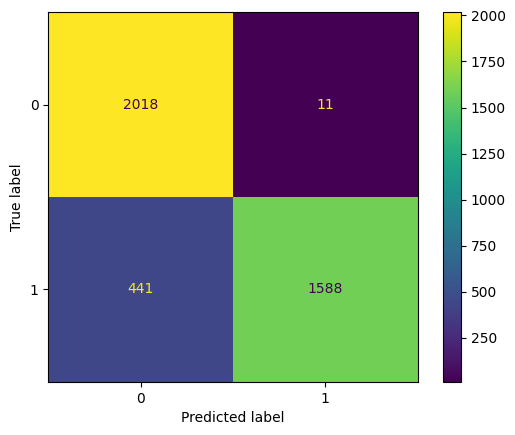

In [393]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = matrix)
disp.plot()